##### 轮廓检测

需要对图像进行二值化处理

基本流程：
1. 读取图像
2. 二值化（灰度）处理
3. 设定图像阈值
4. 调用检测函数 `findContours`进行轮廓检测

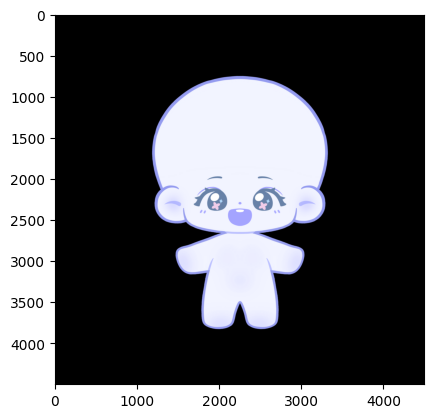

In [1]:
# notebook 里自动绘制图像
%matplotlib inline 

import cv2
import matplotlib
import matplotlib.pyplot as plt

# 读取图像
img = cv2.imread('../imgs/09.png')
# 绘制图像
plt.imshow(img)

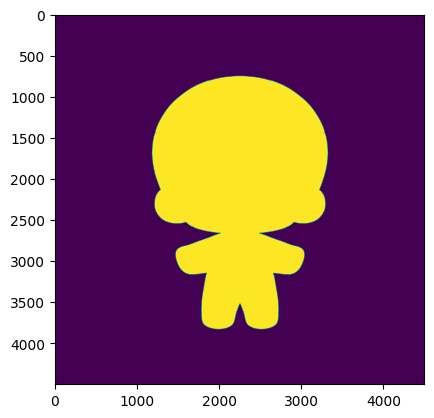

In [8]:
grayImg = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(grayImg,127,255,cv2.THRESH_BINARY)

plt.imshow(thresh)

In [13]:
major = cv2.__version__.split('.')[0]
major

'4'

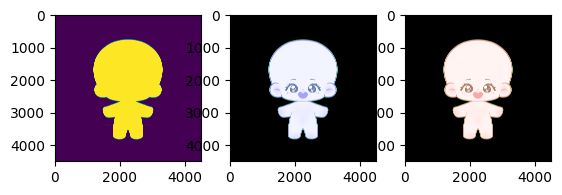

In [21]:
# 检测轮廓
grayImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(grayImg, 127, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
plt.subplot(1,3,1)
plt.imshow(thresh)

# 需要进行copy，后者会改变原图
draw_img = img.copy()
# 第三个参数 -1 代表所有轮廓，第四个参数代表轮廓的颜色（此处为 BGR 通道的绿色），最后一个参数是轮廓线的厚度
res = cv2.drawContours(draw_img,contours,-1,(0,255,0),4)
plt.subplot(1,3,2)
plt.imshow(res) 
cvtImge = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)
plt.subplot(1,3,3)
plt.imshow(cvtImge) 


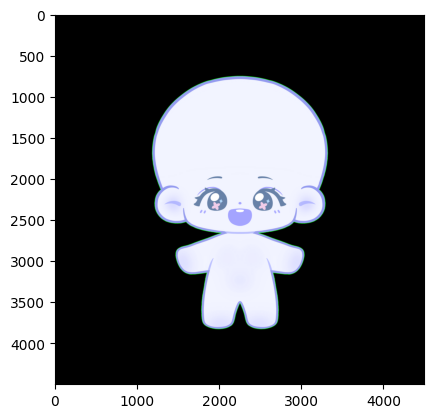

In [30]:
res2 = cv2.drawContours(draw_img,contours,0,(0,255,0),4)
plt.imshow(res2)

###### 轮廓特征

操作目标是具体的轮廓

In [29]:
# 计算面积
firstCnt = contours[0]
cv2.contourArea(firstCnt)

4647753.0

In [36]:
# 周长，闭合的
circumstants1 = cv2.arcLength(firstCnt,True)

In [34]:
# 周长，非闭合的
cv2.arcLength(firstCnt,False)

12154.702789068222

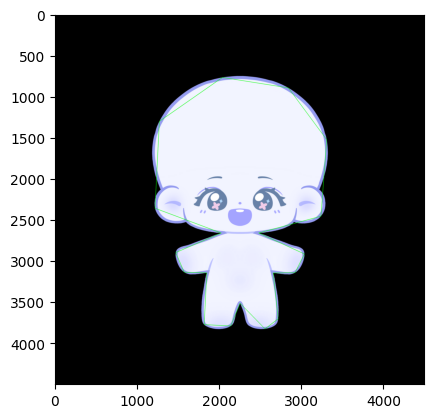

In [39]:
# 轮廓近似
draw_img2 = img.copy()
epsilon = 0.01*circumstants1
approx = cv2.approxPolyDP(firstCnt,epsilon,True)
approxImg = cv2.drawContours(draw_img2,[approx],-1,(0,255,0),4)
plt.imshow(approxImg)

0.7062634368896985

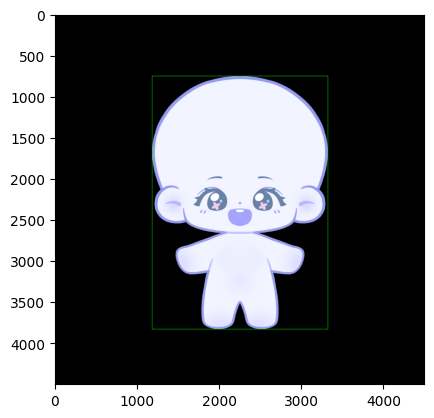

In [41]:
# 边界矩形
x,y,w,h = cv2.boundingRect(firstCnt)
boudingRectangle = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),4)
plt.imshow(boudingRectangle)
# 计算轮廓跟外接矩形的占比
area = cv2.contourArea(firstCnt)
rectArea = w*h
extent = float(area)/rectArea
extent

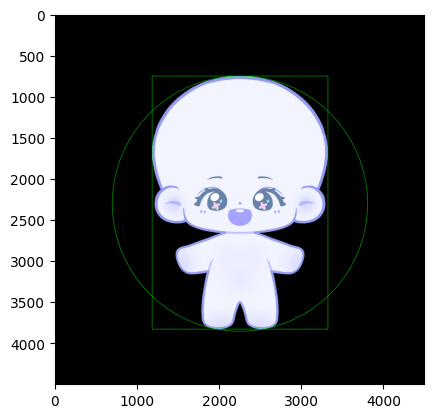

In [42]:
# 外接圆
(x,y),radius = cv2.minEnclosingCircle(firstCnt)
center = (int(x),int(y))
radius = int(radius)
outCircle = cv2.circle(boudingRectangle,center,radius,(0,255,0),4)
plt.imshow(outCircle)


##### 判断时候有子轮廓

在OpenCV中，可以使用`cv2.findContours()`函数的`hierarchy`参数来判断轮廓的层次结构，包括父轮廓、子轮廓、相邻轮廓等信息。`hierarchy`是一个四维数组，每个轮廓对应一个四元组`[Next, Previous, First Child, Parent]`。

要判断一个轮廓是否有子轮廓，可以通过检查对应轮廓的`First Child`索引是否大于等于0来判断。如果大于等于0，表示存在子轮廓；如果小于0，表示没有子轮廓。

In [44]:
#示例中，遍历了所有的轮廓，并通过检查`hierarchy[0][i][2]`的值是否为-1来判断是否有子轮廓。如果`hierarchy[0][i][2]`的值不为-1，则表示第`i`个轮廓存在子轮廓。

import cv2

# 读取图像并转换为灰度图像
img = cv2.imread('../imgs/09.png')
grayImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 二值化处理
ret, thresh = cv2.threshold(grayImg, 127, 255, cv2.THRESH_BINARY)

# 查找轮廓
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# 遍历轮廓及其层次结构
for i, contour in enumerate(contours):
    # 判断是否有子轮廓
    has_child = hierarchy[0][i][2] != -1

    # 打印轮廓编号及是否有子轮廓
    print(f"Contour {i}: Has Child = {has_child}")

Contour 0: Has Child = False
